In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [19]:
enddate = date.datetime(2019,11,1)
startdate = date.datetime(2016,1,1)
tick = 'PE&OLES.MX'
ipc = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [20]:
ipc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990
2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978
2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024
2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002
2016-01-08,624.140015,606.000000,619.659973,607.049988,5512900,607.049988


In [21]:
def RSI(df, n):
    i = 0
    UpI = [0]
    DoI = [0]
    df = df.reset_index()
    while i + 1 <= df.index[-1]:
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else: UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else: DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(pd.Series.ewm(UpI, span = n, min_periods = n -1).mean())
    NegDI = pd.Series(pd.Series.ewm(DoI, span = n, min_periods = n -1).mean())
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))
    df = df.join(RSI)
    df.set_index('Date', inplace=True)
    return df

In [22]:
df = RSI(ipc,14)

C:\Users\Noemy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\Noemy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [23]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,RSI_14
Date,,,,,,,
2019-10-28,1778.699951,1742.500000,1748.060059,1777.079956,3708900,1777.079956,0.366423
2019-10-29,1777.000000,1755.810059,1774.810059,1762.709961,2273700,1762.709961,0.366423
2019-10-30,1782.380005,1759.119995,1760.239990,1779.989990,2442400,1779.989990,0.394922
2019-10-31,1792.000000,1771.479980,1775.989990,1776.660034,2779100,1776.660034,0.446309
2019-11-01,1797.449951,1785.209961,1788.010010,1791.439941,2788700,1791.439941,0.475429


In [24]:
x = range(len(df.index))

No handles with labels found to put in legend.


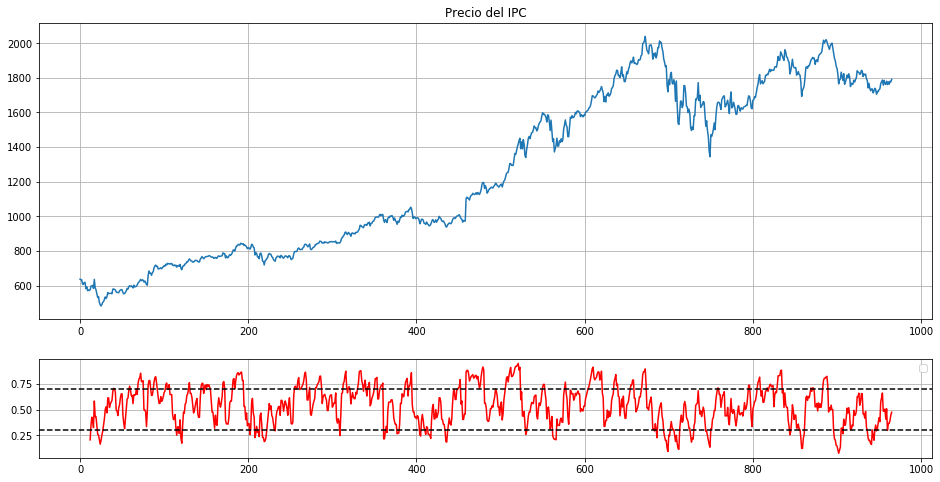

In [25]:
fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(2,1,figure = fig,height_ratios=[3,1])
axl = plt.subplot(gs[0])
plt.plot(x,df.Close)
plt.grid(True)
plt.title('Precio del IPC')
ax2 = plt.subplot(gs[1],sharex=axl)
plt.plot(x,df.RSI_14, color = 'r')
plt. axhline(y=0.7, color='k', linestyle = '--')
plt. axhline(y=0.3, color='k', linestyle = '--')
plt.legend()
plt.grid(True)
plt.show()